# Load datasets

In [1]:
import pandas as pd

In [47]:
#File path
file_path = "bilans_skons_en.xlsx"

# Load Assets sheet
df_assets = pd.read_excel(
    file_path,
    sheet_name="MIF_A",
    skiprows=5)

# Column name
cols_name = ("period", "loans_total", "loans_gen_gov", 
             "loans_dom", "debt_securities_total", "debt_securities_gen_gov", 
             "debt_securities_dom", "equity_and_non_mmf_investment_fund_share", 
             "external_assets", "fixed_assets", "remaining_assets", "total_asset")

df_assets.columns = cols_name

df_assets.head()

,period,loans_total,loans_gen_gov,loans_dom,debt_securities_total,debt_securities_gen_gov,debt_securities_dom,equity_and_non_mmf_investment_fund_share,external_assets,fixed_assets,remaining_assets,total_asset
0,1996-12-31,80119.2,4020.9,76098.3,58761.6,58247.2,514.4,1785.3,74170.337,9200.8,20272.3,244309.6
1,1997-01-31,82623.0,4115.1,78507.9,56627.1,56240.3,386.8,1772.0,75948.539,9204.2,24358.9,250533.7
2,1997-02-28,84767.2,4252.8,80514.4,54865.0,54466.5,398.5,1798.1,77874.801,9326.6,26275.9,254907.6
3,1997-03-31,87863.3,4621.8,83241.5,58960.5,58476.7,483.8,1880.7,81300.067,9515.6,26621.5,266141.6
4,1997-04-30,90789.7,5050.3,85739.4,57907.3,57456.4,450.9,2021.2,81796.207,9707.1,28278.5,270500.0


In [49]:
# Load Liabilities sheet
df_liabs = pd.read_excel(
    file_path,
    sheet_name="MIF_P",
    skiprows=5,
)

# Column name
cols_name = ("period", "currency", "depo_gov",
             "depo_dom_total", "depo_dom_overnight", "depo_dome_agreed_maturity",
             "depo_dom_repos", "money_market_fund_shares", "debt_securities_issued",
             "capital_and_reserves", "external_liabs", "remaining_liabs", 
             "excess_inter_monetary_fi_liabs", "total_liabs")

df_liabs.columns = cols_name

df_liabs.head()

,period,currency,depo_gov,depo_dom_total,depo_dom_overnight,depo_dome_agreed_maturity,depo_dom_repos,money_market_fund_shares,debt_securities_issued,capital_and_reserves,external_liabs,remaining_liabs,excess_inter_monetary_fi_liabs,total_liabs
0,1996-12-31,23563.881,7941.7,119225.0,44302.10,74777.5,145.406,NaN,1316.6,22859.2,12630.328,55414.5,1355.4,244309.6
1,1997-01-31,22854.947,8054.4,118885.9,40808.09,77714.4,343.692,NaN,1805.9,22893.6,13773.970,61428.7,838.6,250533.7
2,1997-02-28,23513.543,6200.8,120615.1,40112.20,80195.0,307.911,NaN,1736.6,23052.5,14343.943,64521.1,924.0,254907.6
3,1997-03-31,24591.241,7669.7,122541.1,40906.60,81241.5,393.004,NaN,2459.6,23440.2,18586.428,65773.2,1080.2,266141.6
4,1997-04-30,25873.434,6249.8,124348.5,40761.90,83468.5,118.148,NaN,2499.7,23772.3,17007.654,69493.6,1255.1,270500.0


In [53]:
# Merge dataset
df = df_assets.merge(
    df_liabs,
    on="period",
    how="inner",
    suffixes=("_asset", "_liability")
)

df.head()

,period,loans_total,loans_gen_gov,loans_dom,debt_securities_total,debt_securities_gen_gov,debt_securities_dom,equity_and_non_mmf_investment_fund_share,external_assets,fixed_assets,...,depo_dom_overnight,depo_dome_agreed_maturity,depo_dom_repos,money_market_fund_shares,debt_securities_issued,capital_and_reserves,external_liabs,remaining_liabs,excess_inter_monetary_fi_liabs,total_liabs
0,1996-12-31,80119.2,4020.9,76098.3,58761.6,58247.2,514.4,1785.3,74170.337,9200.8,...,44302.10,74777.5,145.406,NaN,1316.6,22859.2,12630.328,55414.5,1355.4,244309.6
1,1997-01-31,82623.0,4115.1,78507.9,56627.1,56240.3,386.8,1772.0,75948.539,9204.2,...,40808.09,77714.4,343.692,NaN,1805.9,22893.6,13773.970,61428.7,838.6,250533.7
2,1997-02-28,84767.2,4252.8,80514.4,54865.0,54466.5,398.5,1798.1,77874.801,9326.6,...,40112.20,80195.0,307.911,NaN,1736.6,23052.5,14343.943,64521.1,924.0,254907.6
3,1997-03-31,87863.3,4621.8,83241.5,58960.5,58476.7,483.8,1880.7,81300.067,9515.6,...,40906.60,81241.5,393.004,NaN,2459.6,23440.2,18586.428,65773.2,1080.2,266141.6
4,1997-04-30,90789.7,5050.3,85739.4,57907.3,57456.4,450.9,2021.2,81796.207,9707.1,...,40761.90,83468.5,118.148,NaN,2499.7,23772.3,17007.654,69493.6,1255.1,270500.0


# Preliminary analysis

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df_assets.isna().sum()
df_liabs.isna().sum()

period                              0
currency                            0
depo_gov                            0
depo_dom_total                      0
depo_dom_overnight                  0
depo_dome_agreed_maturity           0
depo_dom_repos                      0
money_market_fund_shares          109
debt_securities_issued              0
capital_and_reserves                0
external_liabs                      0
remaining_liabs                     0
excess_inter_monetary_fi_liabs      0
total_liabs                         0
dtype: int64

**Note:** The money market fund shares only exist starting June 2006

In [76]:
asset_check = (
    df_assets["loans_total"]
    + df_assets["debt_securities_total"]
    + df_assets["equity_and_non_mmf_investment_fund_share"]
    + df_assets["external_assets"]
    + df_assets["fixed_assets"]
    + df_assets["remaining_assets"]
)

(df_assets["total_asset"] - asset_check).describe()


count    348.000000
mean      -0.001029
std        0.045595
min       -0.250000
25%       -0.014250
50%        0.000000
75%        0.015750
max        0.149000
dtype: float64

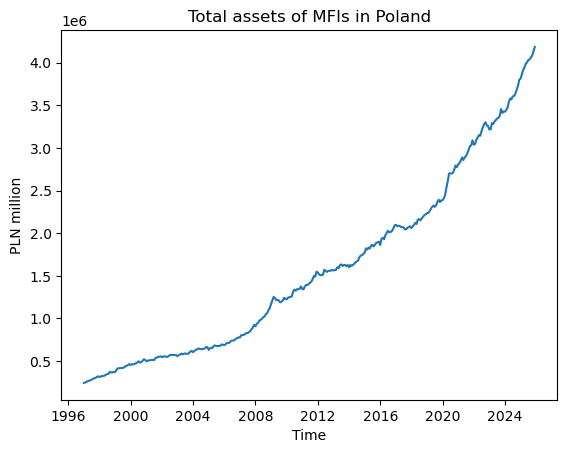

In [87]:
plt.figure()
plt.plot(df_assets["period"], df_assets["total_asset"])
plt.title("Total assets of MFIs in Poland")
plt.xlabel("Time")
plt.ylabel("PLN million")
plt.show()

In [89]:
df_assets["asset_growth"] = df_assets["total_asset"].pct_change()

df_assets["asset_growth"].describe()

count    347.000000
mean       0.008326
std        0.014695
min       -0.049129
25%       -0.000048
50%        0.007913
75%        0.016282
max        0.061520
Name: asset_growth, dtype: float64

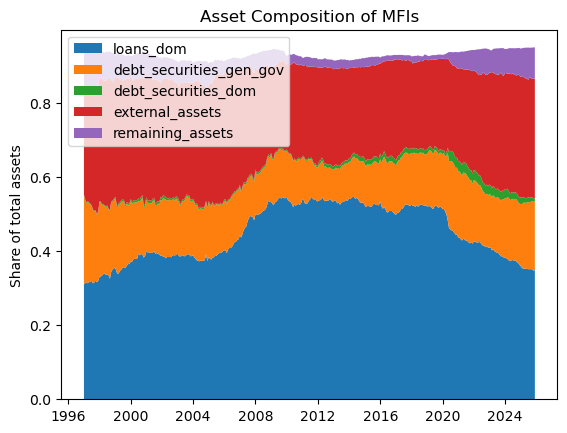

In [107]:
asset_cols = [
    "loans_dom",
    "debt_securities_gen_gov",
    "debt_securities_dom",
    "external_assets",
    "remaining_assets"
]

asset_shares = df_assets[asset_cols].div(
    df_assets["total_asset"], axis=0
)

plt.figure()
plt.stackplot(
    df_assets["period"],
    asset_shares.T,
    labels=asset_cols
)
plt.legend(loc="upper left")
plt.title("Asset Composition of MFIs")
plt.ylabel("Share of total assets")
plt.show()

In [99]:
df_assets["loan_ratio"] = df_assets["loans_dom"] / df_assets["total_asset"]

In [103]:
df_assets["liquid_assets"] = (
    df_assets["external_assets"] + df_assets["remaining_assets"]
)

df_assets["liquid_ratio"] = (
    df_assets["liquid_assets"] / df_assets["total_asset"]
)

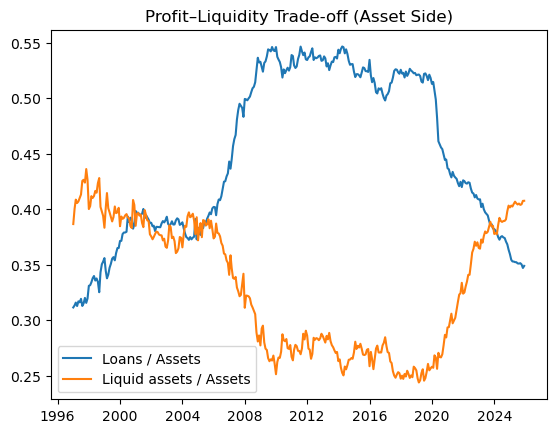

In [105]:
plt.figure()
plt.plot(df_assets["period"], df_assets["loan_ratio"], label="Loans / Assets")
plt.plot(df_assets["period"], df_assets["liquid_ratio"], label="Liquid assets / Assets")
plt.legend()
plt.title("Profit–Liquidity Trade-off (Asset Side)")
plt.show()

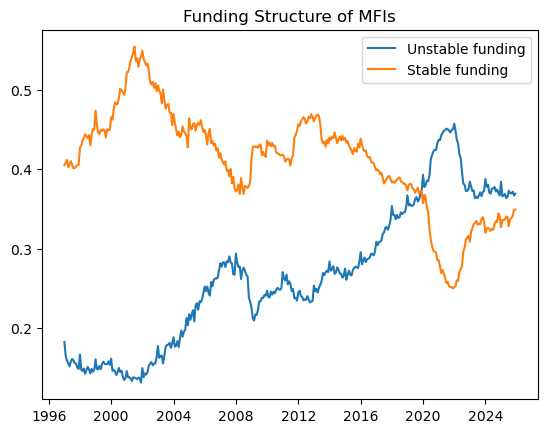

In [121]:
df_liabs["mmf_adj"] = df_liabs["money_market_fund_shares"].fillna(0)

df_liabs["unstable_funding"] = (
    df_liabs["depo_dom_overnight"]
    + df_liabs["depo_dom_repos"]
    + df_liabs["mmf_adj"]
)

df_liabs["stable_funding"] = (
    df_liabs["depo_dome_agreed_maturity"]
    + df_liabs["debt_securities_issued"]
    + df_liabs["capital_and_reserves"]
)

df_liabs["unstable_ratio"] = (
    df_liabs["unstable_funding"] / df_liabs["total_liabs"]
)

df_liabs["stable_ratio"] = (
    df_liabs["stable_funding"] / df_liabs["total_liabs"]
)

plt.figure()
plt.plot(df_liabs["period"], df_liabs["unstable_ratio"], label="Unstable funding")
plt.plot(df_liabs["period"], df_liabs["stable_ratio"], label="Stable funding")
plt.legend()
plt.title("Funding Structure of MFIs")
plt.show()


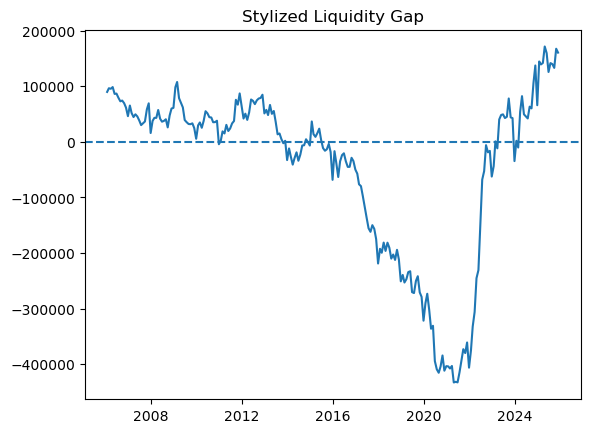

In [111]:
df_liquidity = df_assets[["period", "liquid_assets"]].merge(
    df_liabs[["period", "unstable_funding"]],
    on="period",
    how="inner"
)

df_liquidity["liquidity_gap"] = (
    df_liquidity["liquid_assets"] - df_liquidity["unstable_funding"]
)

plt.figure()
plt.plot(df_liquidity["period"], df_liquidity["liquidity_gap"])
plt.axhline(0, linestyle="--")
plt.title("Stylized Liquidity Gap")
plt.show()


In [113]:
df_assets[asset_cols].pct_change().std()


loans_dom                  0.013269
debt_securities_gen_gov    0.030806
debt_securities_dom        0.099811
external_assets            0.033090
remaining_assets           0.103512
dtype: float64

In [115]:
df_liabs["depo_dom_overnight"].pct_change().quantile([0.05, 0.95])


0.05   -0.031934
0.95    0.056565
Name: depo_dom_overnight, dtype: float64

In [117]:
asset_shares.mean().to_frame("average_share")


,average_share
loans_dom,0.447054
debt_securities_gen_gov,0.141694
debt_securities_dom,0.009962
external_assets,0.286005
remaining_assets,0.044376


In [119]:
df_liabs[["unstable_ratio", "stable_ratio"]].mean()


unstable_ratio    0.312908
stable_ratio      0.411214
dtype: float64